# Impact of $c_s^2$ on observables

Usual dark energy models assume an effective sound speed of $c_s^2 = 1$. What is the impact of another choice, *e.g.* $c_s^2 = 0$?

In [74]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import camb

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["legend.framealpha"] = 0.0

In [75]:
H0 = 67
h = H0/100
omegab = 0.049
omegam = 0.319
omegac = omegam - omegab
As = 2.1e-9
ns = 0.96
tau = 0.07
ombh2 = omegab*h*h
omch2 = omegac*h*h
# DESI DR2 BAO + CMB + Pantheon+ mean
w0 = -0.838
wa = -0.62
ks = np.logspace(-3, 0.1, 200)
redshifts = np.linspace(0, 2, 100)

In [97]:
cases = [
    {"name": "quint", "label": "$c_s^2 = 1$",         "cs2_type": camb.dark_energy.Cs2_Constant, "cs2_0": 1,                      "cs2_1": 0},
    {"name": "clust1e-1", "label": "$c_s^2 = 0.1$",         "cs2_type": camb.dark_energy.Cs2_Constant, "cs2_0": 1e-1,                   "cs2_1": 0},
    {"name": "clust1e-2", "label": "$c_s^2 = 0.01$",         "cs2_type": camb.dark_energy.Cs2_Constant, "cs2_0": 1e-2,                   "cs2_1": 0},
    {"name": "clust1e-3", "label": "$c_s^2 = 0.001$",         "cs2_type": camb.dark_energy.Cs2_Constant, "cs2_0": 1e-3,                   "cs2_1": 0},
    {"name": "0to1",  "label": "$c_s^2$ from 0 to 1", "cs2_type": camb.dark_energy.Cs2_PropToW,  "cs2_0": 1 - (-1/wa - 0.001)*w0, "cs2_1": -1/wa - 0.001},
    {"name": "1to0",  "label": "$c_s^2$ from 1 to 0", "cs2_type": camb.dark_energy.Cs2_PropToW,  "cs2_0": -(1/wa + 0.001)*w0,     "cs2_1": 1/wa + 0.001},
]

def get_observables(case):
    cosmo = camb.set_params(
        H0=H0, ombh2=ombh2, omch2=omch2, As=As, ns=ns, tau=tau,
        num_nu_massless=3.044, WantTransfer=True, w0=w0, wa=wa, dark_energy_model="ppf",
        cs2_type=case["cs2_type"], cs2_0=case["cs2_0"], cs2_1=case["cs2_1"]
    )
    cosmo.set_for_lmax(2000, lens_potential_accuracy=1)
    cosmo.set_matter_power(redshifts=redshifts, kmax=20, silent=True, nonlinear=True)
    results = camb.get_results(cosmo)
    P_lin = results.get_matter_power_interpolator(nonlinear=None).P(0, ks)
    fsigma8 = results.get_fsigma8()[::-1]
    cl_tt = results.get_lensed_scalar_cls(CMB_unit='muK')[:,0]
    cl_ee = results.get_lensed_scalar_cls(CMB_unit='muK')[:,1]
    cl_te = results.get_lensed_scalar_cls(CMB_unit='muK')[:,3]
    cl_pp = results.get_lens_potential_cls(lmax=2000)[:,0]
    ev    = results.get_redshift_evolution(ks, redshifts, ['delta_cdm', 'delta_tot', 'delta_tot_de'])
    rhos  = results.get_background_densities(a=1/(1 + redshifts))
    rho_de  = rhos["de"]
    rho_tot = rhos["tot"] # NOTE: tot here includes DE
    rho_no_de = rho_tot - rho_de # NOTE: tot here includes DE
    delta_cdm = ev[:, :, 0]
    delta_no_de = ev[:, :, 1]
    delta_tot = ev[:, :, 2]
    delta_de = (rho_tot*delta_tot - rho_no_de*delta_no_de)/rho_de
    return {"P_lin": P_lin, "fsigma8": fsigma8, "cl_tt": cl_tt, "cl_ee": cl_ee, "cl_te": cl_te, "cl_pp": cl_pp, "delta_cdm": delta_cdm, "delta_de": delta_de}

data = {}
for case in cases:
    data[case["name"]] = get_observables(case)

<>:7: SyntaxWarning: invalid escape sequence '\;'
<>:7: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_15175/449188040.py:7: SyntaxWarning: invalid escape sequence '\;'
  plt.xlabel("$k \; (h/\mathrm{Mpc})$", fontsize=15)


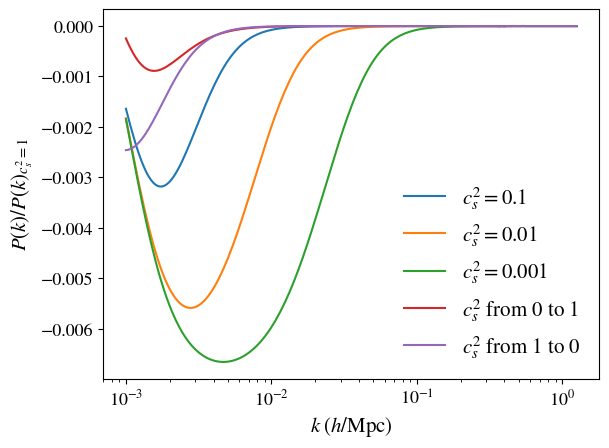

In [98]:
# Plot P(k)
for case in cases:
    if case["name"] == "quint": continue
    plt.semilogx(ks, data[case["name"]]["P_lin"]/data["quint"]["P_lin"] - 1, label=case["label"])

plt.tick_params(labelsize=13)
plt.xlabel("$k \; (h/\mathrm{Mpc})$", fontsize=15)
plt.ylabel("$P(k)/P(k)_{c_s^2 = 1}$", fontsize=15)
plt.legend(fontsize=15)
plt.savefig("plots/cs2_impact_pk.pdf")

Text(0.5, 1.0, 'Impact of the sound speed on $f\\sigma_8$')

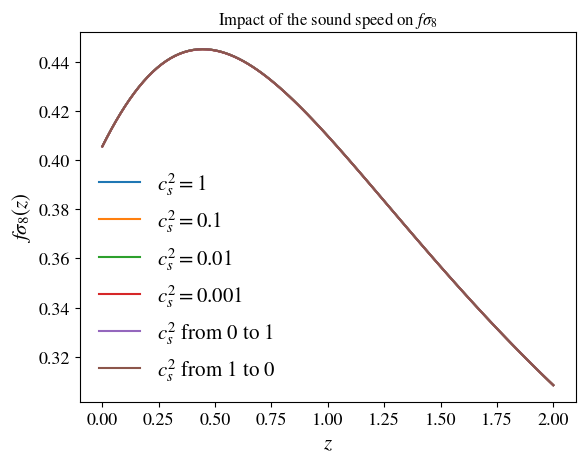

In [99]:
# Plot P(k)
for case in cases:
    # if case["name"] == "quint": continue
    plt.plot(redshifts, data[case["name"]]["fsigma8"], label=case["label"])

plt.tick_params(labelsize=13)
plt.xlabel("$z$", fontsize=15)
plt.ylabel("$f\\sigma_8(z)$", fontsize=15)
plt.legend(fontsize=15)
# plt.savefig("plots/cs2_impact_pk.pdf")


plt.title("Impact of the sound speed on $f\\sigma_8$")

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_15175/152101815.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta(f\\sigma_8(z))/(f\sigma_8(z)_{c_s^2=1})$", fontsize=15)


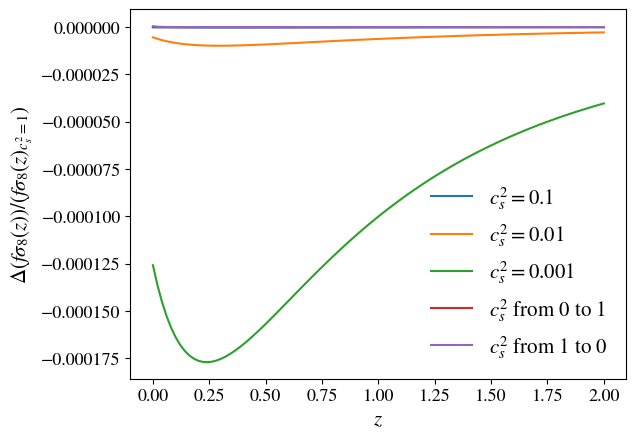

In [ ]:
# Plot P(k)
for case in cases:
    if case["name"] == "quint": continue
    plt.plot(redshifts, data[case["name"]]["fsigma8"]/data["quint"]["fsigma8"] - 1, label=case["label"])

plt.tick_params(labelsize=13)
plt.xlabel("$z$", fontsize=15)
plt.ylabel(r"$\Delta(f\\sigma_8(z))/(f\sigma_8(z)_{c_s^2=1})$", fontsize=15)
plt.legend(fontsize=15)
# plt.savefig("plots/cs2_impact_pk.pdf")

/tmp/ipykernel_15175/2959947901.py:5: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(ells, data[case["name"]]["cl_pp"]/data["quint"]["cl_pp"] - 1, label=case["label"])


Text(0.5, 1.0, 'Impact of $c_s^2$ on CMB lensing')

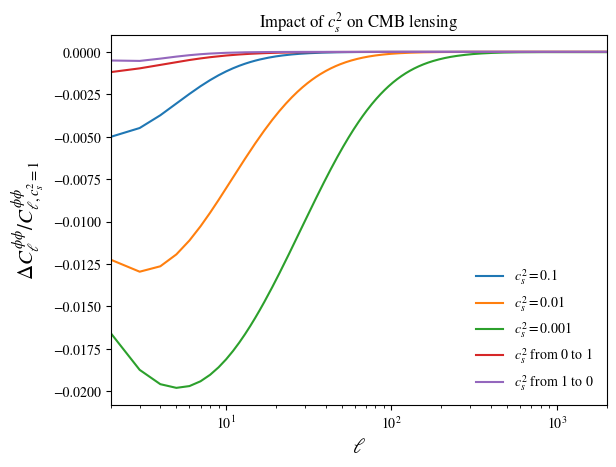

In [101]:
# Plot P(k)
ells = np.arange(2001)
for case in cases:
    if case["name"] == "quint": continue
    plt.semilogx(ells, data[case["name"]]["cl_pp"]/data["quint"]["cl_pp"] - 1, label=case["label"])

plt.xlim([2, 2000])
plt.xlabel(r"$\ell$", fontsize=15)
plt.ylabel(r"$\Delta C_\ell^{\phi\phi}/C_{\ell, c_s^2=1}^{\phi\phi}$", fontsize=15)
plt.legend()
plt.title("Impact of $c_s^2$ on CMB lensing")

/tmp/ipykernel_15175/2529511877.py:5: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(ells, data[case["name"]]["cl_tt"]/data["quint"]["cl_tt"] - 1, label=case["label"])


Text(0.5, 1.0, 'Impact of $c_s^2$ on CMB TT')

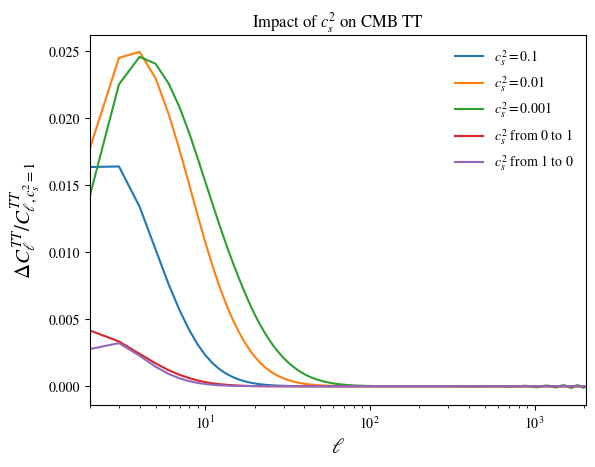

In [102]:
# Plot P(k)
ells = np.arange(2051)
for case in cases:
    if case["name"] == "quint": continue
    plt.semilogx(ells, data[case["name"]]["cl_tt"]/data["quint"]["cl_tt"] - 1, label=case["label"])

plt.xlabel(r"$\ell$", fontsize=15)
plt.ylabel(r"$\Delta C_\ell^{TT}/C_{\ell, c_s^2=1}^{TT}$", fontsize=15)
plt.xlim([2, 2050])
plt.legend()
plt.title("Impact of $c_s^2$ on CMB TT")

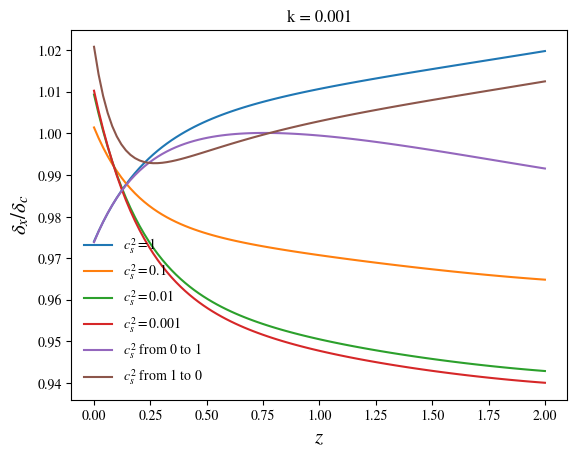

In [113]:
k_index = 0
for case in cases:
    plt.plot(redshifts, data[case["name"]]["delta_de"][k_index]/data[case["name"]]["delta_cdm"][k_index],  label=case["label"])
plt.title(f"k = {ks[k_index]}")
plt.xlabel("$z$", fontsize=15)
plt.ylabel(r"$\delta_x/\delta_c$", fontsize=15)
plt.legend()